<a href="https://colab.research.google.com/github/DS-Ankit/DataSciencealgorithm/blob/master/BlackFriday_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv('bftrain.csv')
datasets=pd.read_csv('bftest.csv')
dataset.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


dont trust .info() for checking null values use isnull()


In [3]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [4]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
dataset['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

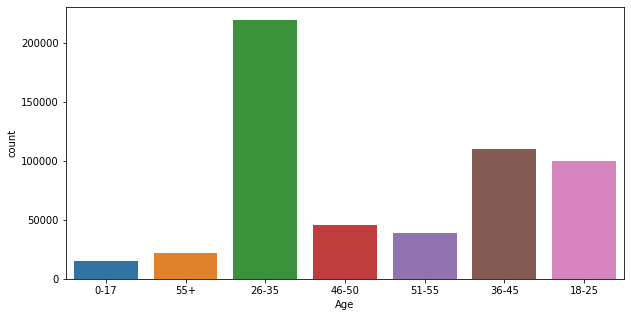

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Age'])

In [7]:
print(dataset['Product_Category_1'].unique())
print(dataset['Product_Category_2'].unique())
print(dataset['Product_Category_3'].unique())


[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
dataset['User_ID'] = dataset['User_ID'] - 1000000
datasets['User_ID'] = datasets['User_ID'] - 1000000

enc = LabelEncoder()
dataset['User_ID'] = enc.fit_transform(dataset['User_ID'])
datasets['User_ID'] = enc.transform(datasets['User_ID'])

In [0]:
dataset['Product_ID'] = dataset['Product_ID'].str.replace('P00', '')
datasets['Product_ID'] = datasets['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()

dataset['Product_ID'] = scaler.fit_transform(dataset['Product_ID'].values.reshape(-1, 1))
datasets['Product_ID'] = scaler.transform(datasets['Product_ID'].values.reshape(-1, 1))

In [0]:
categorical_col = ['Gender', 'City_Category']
numerical_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [0]:
dataset['Age']=dataset['Age'].replace('0-17',17)
dataset['Age']=dataset['Age'].replace('18-25',25)
dataset['Age']=dataset['Age'].replace('26-35',35)
dataset['Age']=dataset['Age'].replace('36-45',45)
dataset['Age']=dataset['Age'].replace('46-50',50)
dataset['Age']=dataset['Age'].replace('51-55',55)
dataset['Age']=dataset['Age'].replace('55+',60)

In [0]:
datasets['Age']=datasets['Age'].replace('0-17',17)
datasets['Age']=datasets['Age'].replace('18-25',25)
datasets['Age']=datasets['Age'].replace('26-35',35)
datasets['Age']=datasets['Age'].replace('36-45',45)
datasets['Age']=datasets['Age'].replace('46-50',50)
datasets['Age']=datasets['Age'].replace('51-55',55)
datasets['Age']=datasets['Age'].replace('55+',60)

In [0]:
dataset['Stay_In_Current_City_Years']=dataset['Stay_In_Current_City_Years'].replace('4+',4)
datasets['Stay_In_Current_City_Years']=datasets['Stay_In_Current_City_Years'].replace('4+',4)

missing values with zero

In [0]:
train = dataset.fillna(0)
test = datasets.fillna(0)

In [0]:
# Encoding categorical columns

encoder = LabelEncoder()

for col in categorical_col:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [0]:
# Scaling numerical columns

scaler = StandardScaler()

for col in numerical_col:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

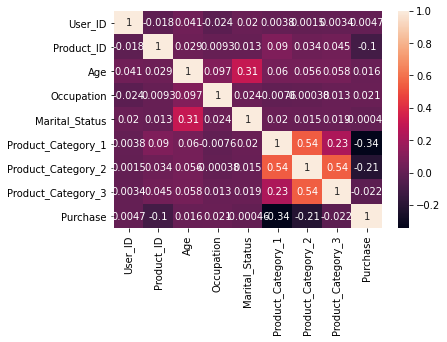

In [17]:
sns.heatmap(
    dataset.corr(),
    annot=True
)

 key point from the above plot are the positive correlation coefficients of three features as a function of Purchase:

Occupation
Stay_In_Current_City_Years
Marital Status
Increase in any of the values for the above three features is likey to result in a higher purchase from the customer.

In [0]:
X = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]

In [0]:
from sklearn.model_selection import train_test_split
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)


In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [0]:
reg=linear_model.LinearRegression()
lm_model=reg.fit(X_train,y_train)
pred=lm_model.predict(X_val)

In [22]:
np.sqrt(mean_squared_error(y_val,pred))

4609.769799176727

In [23]:
xgb_reg = xgb.XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))

print (xgb_reg)

[23:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=6, min_child_weight=40, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
             subsample=1, verbosity=1)


In [24]:
rmse

2591.851957367946

In [25]:
regressor = RandomForestRegressor(n_estimators=300, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
Rmse = np.sqrt(mean_squared_error(y_pred, y_val))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [26]:
Rmse

2743.6182259357274

So we go with Xgboost model as it has low rmse value.